In [1]:
import numpy      as np
import tensorflow as tf

In [37]:
inputs = tf.keras.Input(name='inputs',shape=(1),dtype=tf.dtypes.float32)
hidden = tf.keras.layers.Dense(10,activation=tf.nn.sigmoid,name='hidden')
output = tf.keras.layers.Dense(1,activation=None,name='output')
model  = tf.keras.Sequential([inputs, hidden, output ])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 10)                20        
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [39]:
x_train = np.linspace(0,2,100,endpoint=True)
print(f"The shape of x_train is {x_train.shape}")

The shape of x_train is (100,)


In [40]:
x_t = np.zeros((len(x_train),1))
print(f"The shape of x_t is {x_t.shape}")

The shape of x_t is (100, 1)


In [42]:
x_t[:,0]=x_train

In [46]:
epochs = 50000
Adam   = tf.keras.optimizers.Adam(1e-2)

In [47]:
x = tf.constant(x_t,dtype=float)
trainable_vars = model.trainable_variables

In [51]:
losses = []
for ix in range(100):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        tape.watch(trainable_vars)
        y = model(x,training=True)
        dy_dx = tape.gradient(y,x)  
        A = (1+3*x**2)/(1+x+x**3)
        t_loss = (dy_dx + (x + A) * y - x**3 - 2*x - x**2*A)**2
        loss  =  tf.reduce_mean(t_loss)+(y[0]-1)**2
        tape.watch(loss)

    gradients = tape.gradient(loss, trainable_vars)
    Adam.apply_gradients(zip(gradients, trainable_vars))
    losses.append(loss.numpy()[0])

In [54]:
known = np.exp(-0.5*x_train**2)/(1+x_train+x_train**3)+x_train**2
known.shape

(100,)

In [58]:
output = model(x_t).numpy()
output.shape


(100, 1)

In [2]:
import matplotlib.pyplot as plt

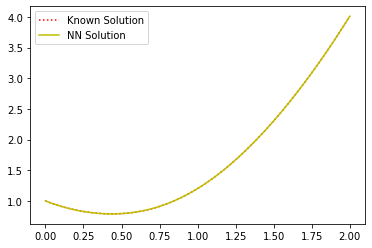

In [71]:
plt.plot(x_train,known,'r:',label='Known Solution')
plt.plot(x_train,output,'y-',label='NN Solution')
plt.legend()
plt.savefig('Results.png')
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error as mse
mse(known,output)

8.301666026528607e-07

## Second Order ODE

In [3]:
inputs = tf.keras.Input(name='inputs',shape=(1),dtype=tf.dtypes.float32)
hidden = tf.keras.layers.Dense(32,activation=tf.nn.sigmoid,name='hidden')
hidden2 = tf.keras.layers.Dense(32,activation=tf.nn.sigmoid,name='hidden2')
output = tf.keras.layers.Dense(1,activation=None,name='output')
model_sec = tf.keras.Sequential([inputs, hidden,hidden2,output ])
model_sec.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 32)                64        
_________________________________________________________________
hidden2 (Dense)              (None, 32)                1056      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [4]:
x_train = np.linspace(0,2,100,endpoint=True)
x_t = x_train.copy().reshape(-1,1)
print(f"The shape of x_train is {x_train.shape} and shape of x_t is {x_t.shape}")

The shape of x_train is (100,) and shape of x_t is (100, 1)


In [48]:
epochs = 5000
Adam   = tf.keras.optimizers.Adam(1e-2)
x = tf.constant(x_t,dtype=float)
trainable_vars = model_sec.trainable_variables
losses = []
for ix in range(epochs):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        tape.watch(trainable_vars)
        y = model_sec(x,training=True)
        dy_dx = tape.gradient(y,x)
#         print(dy_dx.shape)
        dy_dx2 = tape.gradient(dy_dx,x)
        t_loss = (dy_dx2 -2 +6*x)**2
        loss  =  tf.reduce_mean(t_loss)+(dy_dx[0]-4)**2 + (y[0]-1)**2
        tape.watch(loss)
#         break

    gradients = tape.gradient(loss, trainable_vars)
    Adam.apply_gradients(zip(gradients, trainable_vars))
    losses.append(loss.numpy()[0])

In [24]:
known = x_train**2 - x_train**3 + 4*x_train +1

In [49]:
nn_out = model_sec.predict(x_train)

In [50]:
known.shape,nn_out.shape

((100,), (100, 1))

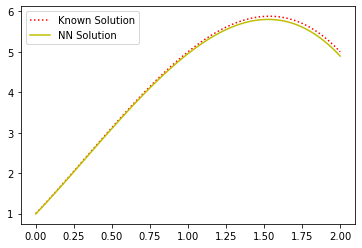

In [53]:
plt.plot(x_train,known,'r:',label='Known Solution')
plt.plot(x_train,nn_out,'y-',label='NN Solution')
plt.legend()
plt.savefig('Results_2ndODE.png')
plt.show()

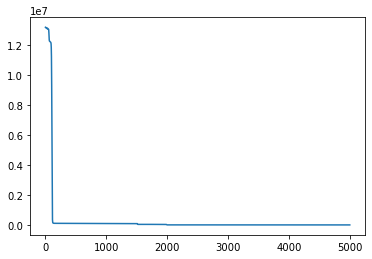

In [38]:
plt.plot(losses)

In [125]:
len(loss)

100